<a href="https://colab.research.google.com/github/swapnalishamrao/Supervised_ML_Classification_Project/blob/main/Supervised_ML_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size='8px'><font color='indigo'><u>**Airline_Passenger_Referral_Prediction**

##### **Project Type**    - Supervised ML Classification
##### **Contribution**    - Individual
##### **Name**            - Swapnali Shamrao Mane

# <font size='6px'><font color='red'><u>**Project Summary & Technical Documentation-**

Air travel changed the world by connecting people globally in record time, making it a standout invention of the 1900s. Its main strength, speed, turned it into an essential way to transport both goods and people.

In the fast-paced world of air travel, where making passengers happy is crucial, airlines need to predict which passengers will recommend them to others. Knowing which passengers are likely to tell their friends and networks about an airline can significantly improve customer satisfaction and increase profits.

###**Steps**:

 **Getting Data**

 **Cleaning & Preprocessing Data**:

 This involves fixing missing information, handling extreme values, and making data easier to use for analysis.

 **Exploring Data Analysis(EDA)**:

  This means looking at the data using different graphs and charts.

**Dividing the Data**:

Splitting it into parts for training and testing.

**Choosing Models and Hyperparameter Tuning**:

To make accurate predictions, various classification models are used, such as Logistic Regression, Random Forests, and Support Vector Machines (SVM). . Ensuring model reliability, hyperparameter tuning is performed to optimize performance and mitigate overfitting of these models helps make them work better.

**Measuring Performance**:

 This focuses on metrics that tell how well the models work. The most important is Recall, followed by Accuracy and ROC AUC. These metrics show how well the models can correctly identify passengers who will recommend airlines. This is essential for making customer-focused strategies.

#<font size='4px'><font color='3971'><u> **GitHub Link -**

[GitHub Link](https://github.com/swapnalishamrao/Supervised_ML_Classification_Project)

# <font size='6px'><font color='paintgray'><u>**Problem Statement-**


In the competitive airline industry, pleasing customers and keeping them loyal is crucial for success. Airlines are always looking for new ways to make passengers happier and improve their reputation. One big challenge is figuring out which passengers are likely to recommend the airline to others.

The goal is to create a model that can predict which passengers will refer the airline to their friends. This model will help airlines:

  -Make customers happier

  -Make more money

  -Advertise more effectively

  -Provide better service
Stay ahead of the competition



# <font size='6px'><font color='indi'>***Let's Begin !***

## ***1. Know Your Data***

## <font size='5px'><font color='indigo'>**Importing Library and connecting drive**

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# Importing all models from sklearn to be used in model building
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing  metrics for evaluation of models
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import recall_score,f1_score,roc_curve, roc_auc_score

## **Dataset Loading**

In [2]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load the dataset from drive
df = pd.read_excel("/content/drive/MyDrive/data_airline_reviews.xlsx")

##<font size='5px'><font color='darkorange'> **Dataset First View**

In [4]:
# First Five Observations
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Last five observations
df.tail()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
131890,Ukraine International,NaN,Andriy Yesypenko,19th May 2006,Kiev - London (Gatwick) in business class (in ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131892,Ukraine International,NaN,Volodya Bilotkach,29th April 2006,Several flights - KBP to AMS (3 times one way)...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
131893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131894,Ukraine International,NaN,Kasper Hettinga,10th February 2006,KBP-AMS with UIA. Although it was a relatively...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


##<font size='5px'><font color='#skyblue'> **Data Inispection**

In [6]:
# Checking shape of the dataset
df.shape

(131895, 17)

Dataset having 131895 observations and 17 columns.

In [7]:
# Checking columns name of dataset
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

##<font size='5px'><font color='deeppink'>**Dataset Information**

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

1.In the dataset, there are object, float64 dtypes features present.

2.Dataset is having numerical and categorical data.

3.Mixed data (Numerical+Categorical)

4.There are 17 features

In [9]:
# Basic description of Dataset
df.describe(include='all')

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
count,65947,64017.000000,65947,65947,65947,19718,39755,63303,39726,39633,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000,64440
unique,81,NaN,44069,3015,61172,2088,4,4,24549,63,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Spirit Airlines,NaN,Anders Pedersen,19th January 2015,On March 2/14 a friend and I were booked on an...,A320,Solo Leisure,Economy Class,Bangkok to Hong Kong,August 2015,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,2934,NaN,96,253,6,2157,14798,48558,35,1204,NaN,NaN,NaN,NaN,NaN,NaN,33894
mean,NaN,5.145430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962,NaN
std,NaN,3.477532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,NaN
50%,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,NaN
75%,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000,NaN


##<font size='5px'><font color='darkcyan'>**Checking duplicate values**

In [10]:
# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 70711 duplicated values


##<font size='5px'><font color='red'>**Checking Missing Values/Null Values**

In [11]:
# Checking for number of null values
missing_values=df.isnull().sum()
missing_values

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

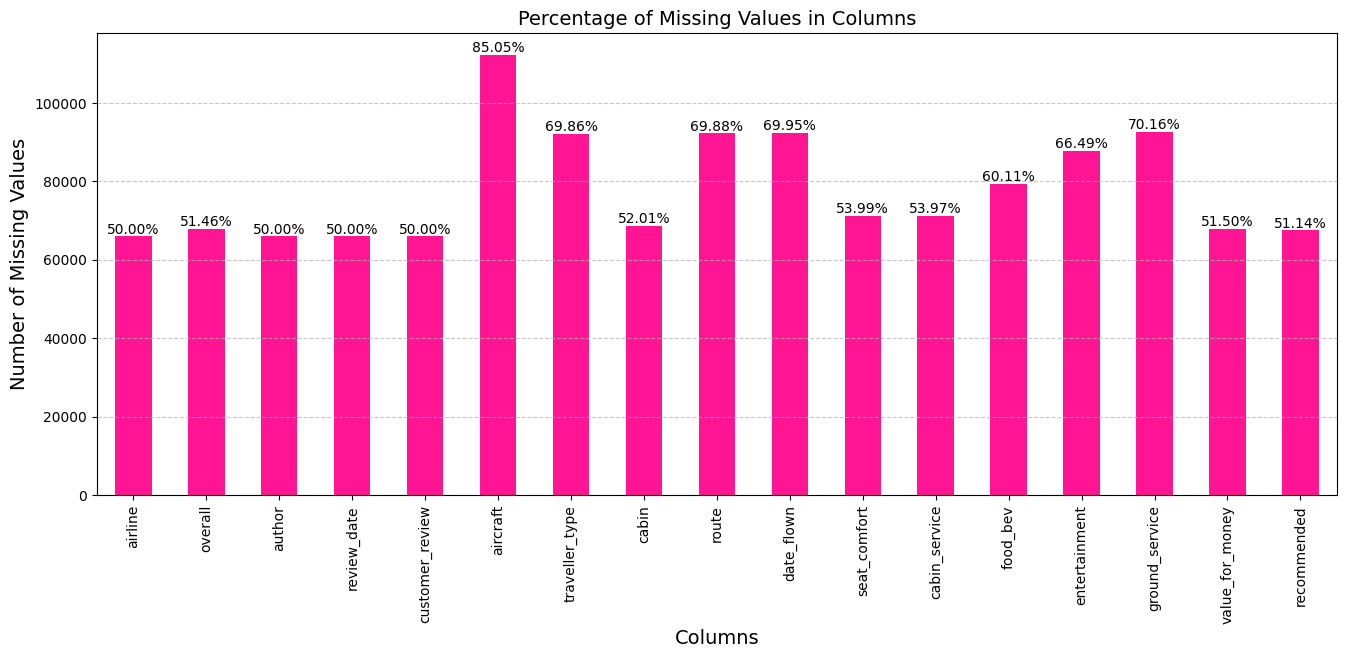

In [12]:
# Visualizing the missing values

columns_with_missing_values = missing_values[missing_values > 0]      #  Filter columns with missing values

# Calculate the percentage of missing values in each column
total_rows = len(df)
percentage_missing = (columns_with_missing_values / total_rows) * 100

# Create a bar chart
plt.figure(figsize=(16, 6))
bar_plot = columns_with_missing_values.plot(kind='bar', color='deeppink')
plt.xlabel('Columns',fontsize=14)
plt.ylabel('Number of Missing Values',fontsize=14)
plt.title('Percentage of Missing Values in Columns',fontsize=14)
plt.xticks(rotation=90, ha='center',fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the percentage of missing values on top of each bar
for index, value in enumerate(columns_with_missing_values):
    plt.text(index, value, f'{percentage_missing[index]:.2f}%', ha='center', va='bottom',fontsize=10)

plt.show()

### What did you know about your dataset?

 -The dataset is well-prepared for further analysis, as it contains 131895 rows and 17 features.

 -There are some missing values in every feature, which need to be fixed either by using the fillna method or dropping the rows.

-Additionally, there are 70711 duplicate rows, which also need to be dropped. so that there is a clean and unique dataset for analysis.

-Most of the features are either objects or floats. If necessary, it needs to be converted into the required datatype.

-After the necessary cleaning, the dataset will be ready for preprocessing steps, allowing the focus to be on feature engineering and model development to achieve accurate predictions.

##<font size='5px'><font color='darkgreen'>**2. Understanding Your Variables**

In [13]:
# Dataset Columns
df.columns

Index(['airline', 'overall', 'author', 'review_date', 'customer_review',
       'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended'],
      dtype='object')

### <font size='5px'><font color='darkorange'>**Variables Description**

**airline:** Name of the airline.

**overall:** Overall point is given to the trip between 1 to 10.

**author:** Author of the trip

**review date:** Date of the Review

**customer review:**Review of the customers in free text format

**aircraft:** Type of the aircraft

**traveller type:** Type of traveler (e.g. business, leisure)

**cabin:** Cabin at the flight date flown: Flight date

**seat comfort:** Rated between 1-5

**cabin service:** Rated between 1-5

**foodbev:** Rated between 1-5

**entertainment:** Rated between 1-5

**ground service:** Rated between 1-5

**value for money:** Rated between 1-5

**recommended**: Binary, target variable.

### <font size='5px'><font color='indigo'>**Check Unique Values for each variable.**

In [14]:
# Check Unique Values for each variable.
df.nunique()

airline               81
overall               10
author             44069
review_date         3015
customer_review    61172
aircraft            2088
traveller_type         4
cabin                  4
route              24549
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64

In [15]:
#Overall discription of data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
overall,64017.0,5.145430,3.477532,1.0,1.0,5.0,9.0,10.0
seat_comfort,60681.0,2.952160,1.441362,1.0,1.0,3.0,4.0,5.0
cabin_service,60715.0,3.191814,1.565789,1.0,2.0,3.0,5.0,5.0
food_bev,52608.0,2.908170,1.481893,1.0,1.0,3.0,4.0,5.0
entertainment,44193.0,2.863372,1.507262,1.0,1.0,3.0,4.0,5.0
ground_service,39358.0,2.692820,1.612215,1.0,1.0,3.0,4.0,5.0
value_for_money,63975.0,2.943962,1.587370,1.0,1.0,3.0,4.0,5.0


In [16]:
# Finding categorical variables
categorical_variables = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical_variables)))
print('--'*45)
print(categorical_variables)

There are 10 categorical variables
------------------------------------------------------------------------------------------
['airline', 'author', 'review_date', 'customer_review', 'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown', 'recommended']


In [17]:
for col in df.select_dtypes(include='object').columns:
  print(col)
  print(df[col].unique())
  print('--'*45)

airline
[nan 'Turkish Airlines' 'Qatar Airways' 'Emirates' 'Lufthansa'
 'KLM Royal Dutch Airlines' 'Virgin America' 'American Airlines'
 'Delta Air Lines' 'Southwest Airlines' 'United Airlines'
 'Jetblue Airways' 'Aegean Airlines' 'Aeroflot Russian Airlines'
 'Aeromexico' 'Air Canada' 'Air New Zealand' 'Alitalia' 'AirAsia'
 'Asiana Airlines' 'Avianca' 'Austrian Airlines' 'British Airways'
 'Brussels Airlines' 'China Eastern Airlines' 'China Southern Airlines'
 'Copa Airlines' 'Ethiopian Airlines' 'Egyptair' 'Finnair' 'Iberia'
 'ANA All Nippon Airways' 'easyJet' 'Korean Air' 'LATAM Airlines'
 'LOT Polish Airlines' 'Qantas Airways' 'Air France' 'Etihad Airways'
 'Pegasus Airlines' 'Royal Jordanian Airlines' 'Ryanair'
 'South African Airways' 'Saudi Arabian Airlines' 'TAP Portugal'
 'Eurowings' 'EVA Air' 'Royal Air Maroc' 'Singapore Airlines'
 'SAS Scandinavian' 'Swiss Intl Air Lines' 'Thai Airways' 'Air India'
 'Air Europa' 'Air Canada rouge' 'airBaltic' 'Air China'
 'Cathay Pacific Airw

In [18]:
# Finding numerical variables
numerical_variables=[var for var in df.columns if var not in categorical_variables]
print('There are {} numerical variables'.format(len(numerical_variables)))
print('--'*45)
print(numerical_variables)

There are 7 numerical variables
------------------------------------------------------------------------------------------
['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']


In [19]:
# Checking unique values from each variable
for i in df.columns.tolist():
  print("No. of unique values in", i ,"is", df[i].nunique())
  print('--'*50)

No. of unique values in airline is 81
----------------------------------------------------------------------------------------------------
No. of unique values in overall is 10
----------------------------------------------------------------------------------------------------
No. of unique values in author is 44069
----------------------------------------------------------------------------------------------------
No. of unique values in review_date is 3015
----------------------------------------------------------------------------------------------------
No. of unique values in customer_review is 61172
----------------------------------------------------------------------------------------------------
No. of unique values in aircraft is 2088
----------------------------------------------------------------------------------------------------
No. of unique values in traveller_type is 4
----------------------------------------------------------------------------------------------------

In [20]:
#Checking the unique values of the target variable
df.recommended.unique()

array([nan, 'yes', 'no'], dtype=object)

## <font size='5px'><font color='deeppink'>**3.Data Wrangling**

In [21]:
# Write your code to make your dataset analysis ready.

# Dropping the column with more than 80 % empty columns
df = df.drop(columns='aircraft',axis=1)

In [22]:
#droping the duplicate values
df.drop_duplicates(inplace = True)

In [23]:
# Convert the "review_date" & "date_flown" column from object to datetime data type
df['review_date'] = pd.to_datetime(df['review_date'])
df['date_flown'] = pd.to_datetime(df['date_flown'])

In [24]:
# Extract the year from the "date_flown" column and create a new column "year"
df['year'] =  df['date_flown'].dt.year

In [25]:
# Check the changes made in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61184 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          61183 non-null  object        
 1   overall          59401 non-null  float64       
 2   author           61183 non-null  object        
 3   review_date      61183 non-null  datetime64[ns]
 4   customer_review  61183 non-null  object        
 5   traveller_type   37540 non-null  object        
 6   cabin            58705 non-null  object        
 7   route            37513 non-null  object        
 8   date_flown       37434 non-null  datetime64[ns]
 9   seat_comfort     56211 non-null  float64       
 10  cabin_service    56240 non-null  float64       
 11  food_bev         48341 non-null  float64       
 12  entertainment    40230 non-null  float64       
 13  ground_service   37169 non-null  float64       
 14  value_for_money  59327 non-null  floa

In [26]:
df.shape

(61184, 17)

### What all manipulations have you done and insights you found?

-First, because the "aircraft" column has over 80% missing information, it's been removed.

-Next, duplicate rows were deleted, which helped to reduce some missing data.

-The "review date" and "date_flown" columns had the wrong data type, so they were changed to the correct type, which is datetime.

-Finally, a new column called "year" was created using information from the "date_flown" column.

##<font size='5px'><font color='darkcyan'>**4.Exploratory Data Analysis(EDA):**

Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

**Questions-**

1.Which Traveller_type has more ratings?

2.Which type of Cabin has more recommendation?

3.Is it Solo Leisure worth for Money?

4.In Economy Class what is the average ratings of Food_bev and entertainment given by passenger?

5.Which cabin type has more service ratings?

6.Which cabin type has overall service ratings?

7.Which travellers_type has overall service ratings?

8.Which airline made highest trips?

9.Comparison of all independent variable/features?

**1) Which Traveller_type has more ratings?**

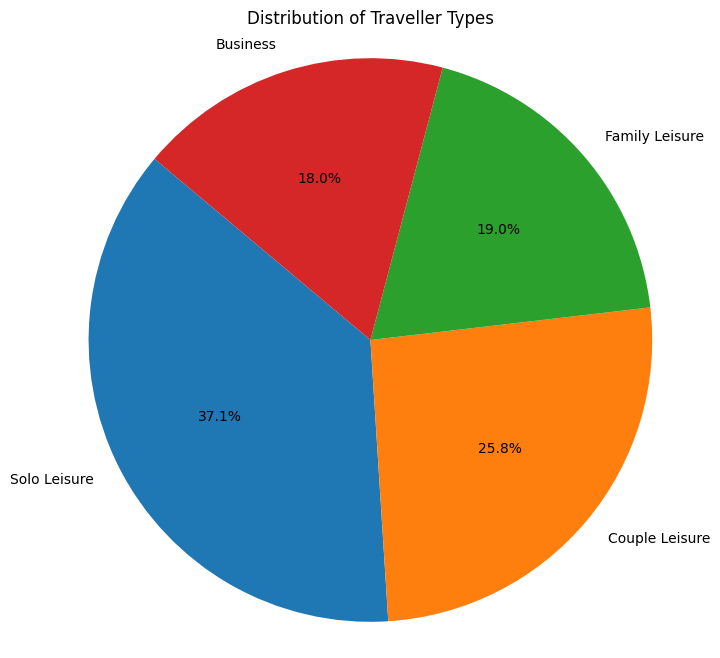

In [27]:
#setting the figure size and plotting the graph
traveller_type_counts = df['traveller_type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(traveller_type_counts, labels=traveller_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Traveller Types')
plt.axis('equal')

# Show the plot
plt.show()

From above plot

-Travelling type of Solo Leisure has more ratings

**2) Which type of Cabin has more recommendation?**

<Axes: xlabel='cabin', ylabel='count'>

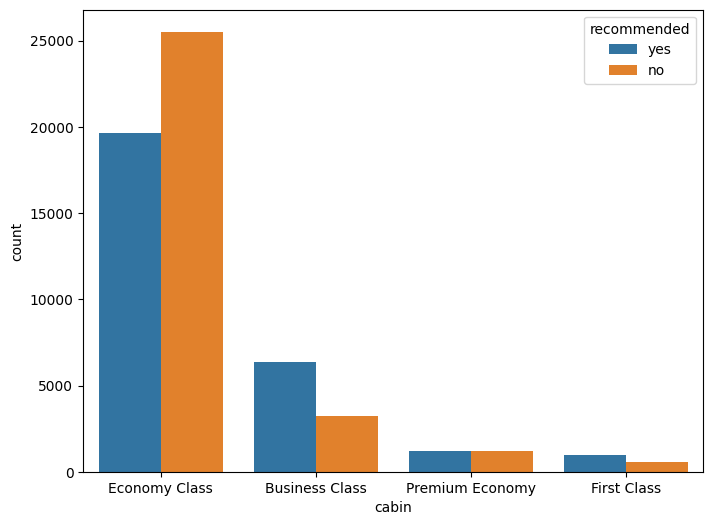

In [28]:
#setting the figure size and plotting the graph
plt.figure(figsize=(8,6))
sns.countplot(x= df['cabin'],hue=df['recommended'])

According to the graph:

- Economy class receives the most recommendations despite having some bad reviews.
- Business class follows as the second most recommended cabin type, generally receiving good reviews.
- Premium economy shows an equal number of reviews, without a clear distinction in recommendations.
- First class is the least recommended cabin type, despite generally having good reviews.

**3)Is going on a solo leisure trip worth the money?**

<Axes: xlabel='traveller_type', ylabel='value_for_money'>

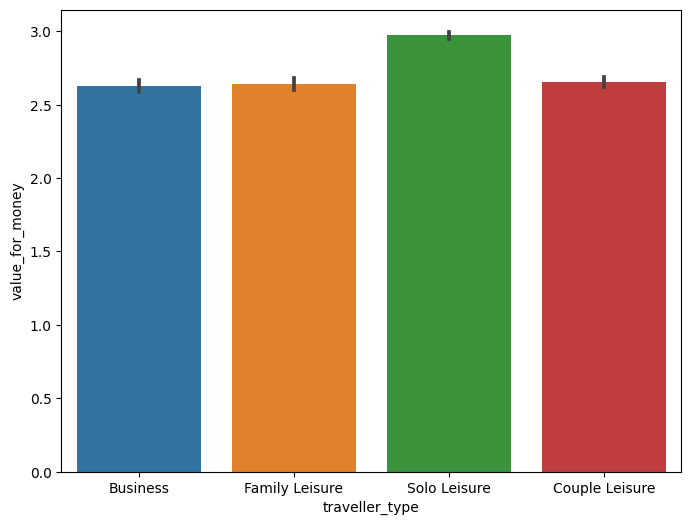

In [29]:
#setting the figure size and plotting the grap
plt.figure(figsize=(8,6))
sns.barplot(x=df['traveller_type'],y=df['value_for_money'])

From above plot

Yes,Travelling Type of Solo Leisure worth of Money compare to other type of travelling.

**4)What are the average ratings passengers give for food and beverage as well as entertainment in Economy Class?**

In [30]:
#performing the grouphby method
eda=df.groupby('cabin')[['food_bev','entertainment']].mean().reset_index()
eda

,cabin,food_bev,entertainment
0,Business Class,3.525108,3.356407
1,Economy Class,2.776919,2.758083
2,First Class,3.384295,3.280827
3,Premium Economy,2.919603,3.038980


<Axes: xlabel='cabin'>

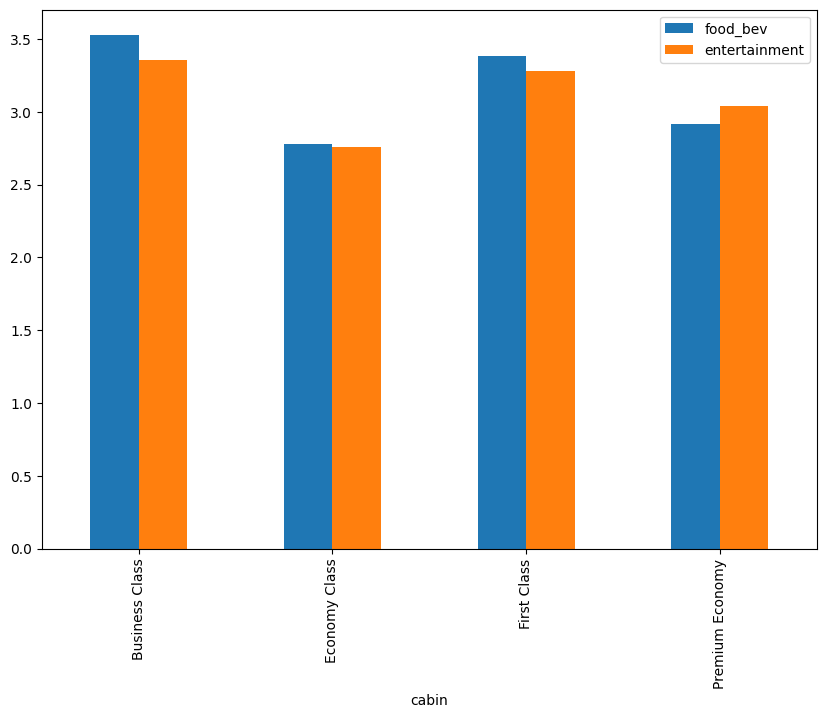

In [31]:
plt.rcParams['figure.figsize']=(10,7)
eda.plot(x="cabin", y=["food_bev", "entertainment"], kind="bar")

According to the plot:

In Economy Class the average ratings of Food_bev and entertainment given by passenger is lowest compared to other cabin classes.rewrite in a simple and new words

**5)Which cabin type receives higher service ratings?**

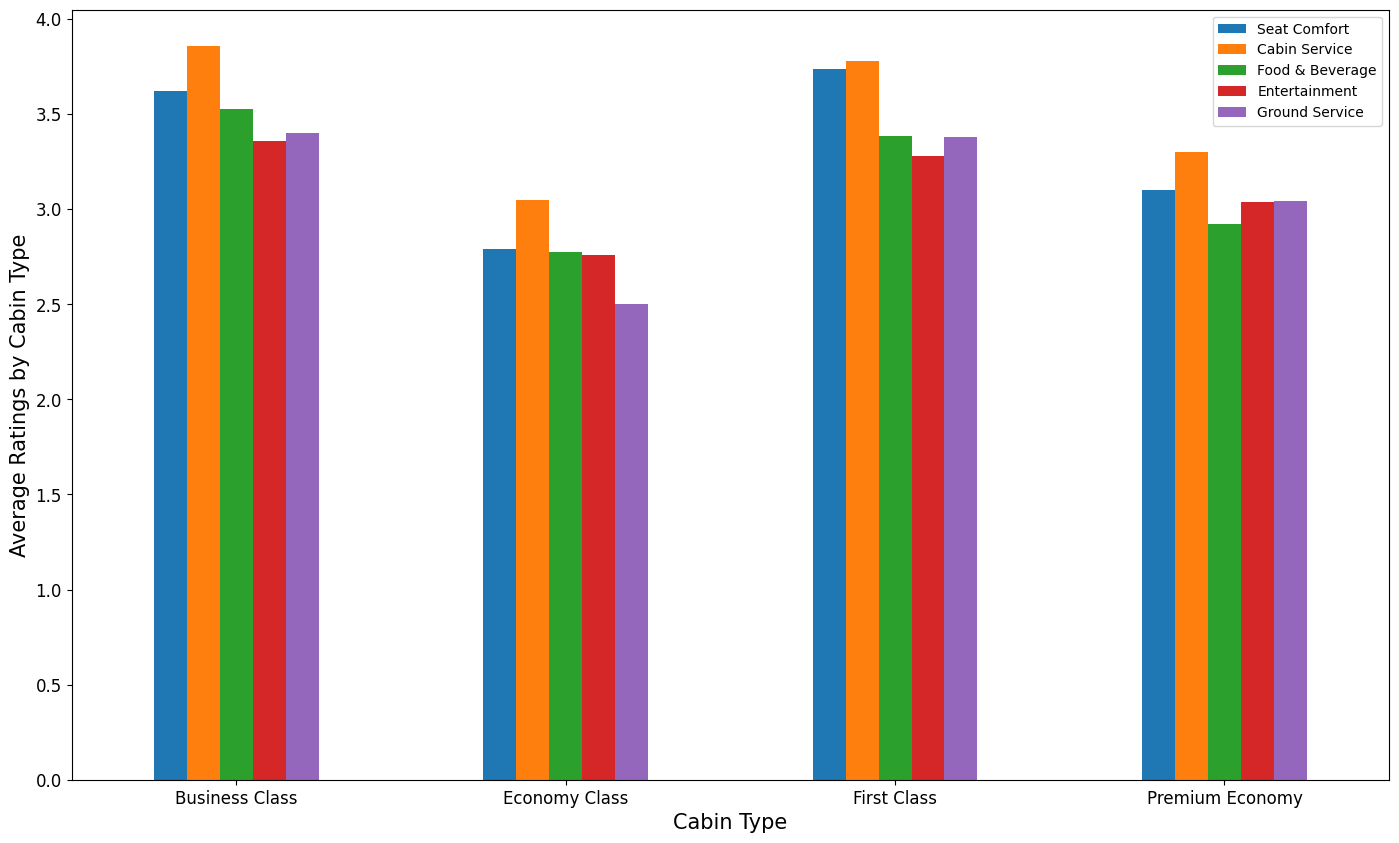

In [32]:
#Cabin type and cabin service ratings
# Calculate the average ratings for 'seat_comfort','cabin_service','food_bev', 'entertainment','ground_service' by cabin
average_ratings = df.groupby('cabin')[['seat_comfort','cabin_service','food_bev', 'entertainment','ground_service']].mean().reset_index()

# Set the figure size
plt.rcParams['figure.figsize']=(17,10)
average_ratings.plot(x="cabin", y=['seat_comfort','cabin_service','food_bev', 'entertainment','ground_service'], kind="bar",fontsize=12)
plt.xlabel("Cabin Type",fontsize=15)
plt.ylabel("Average Ratings by Cabin Type",fontsize=15)
plt.legend(["Seat Comfort", "Cabin Service", "Food & Beverage", "Entertainment", "Ground Service"])
plt.xticks(rotation=0)
plt.show()

From above Graph:

-First-class travelers are the least likely to recommend the airlines.

-The highest probability of receiving a recommendation occurs when passengers rate the cabin service with a full five-star rating.

-For Economy Class, if ratings fall between 4 to 5, it generally indicates that passengers recommend the airlines.

**6)Which cabin type receives the highest overall service ratings?**

<Axes: xlabel='cabin', ylabel='overall'>

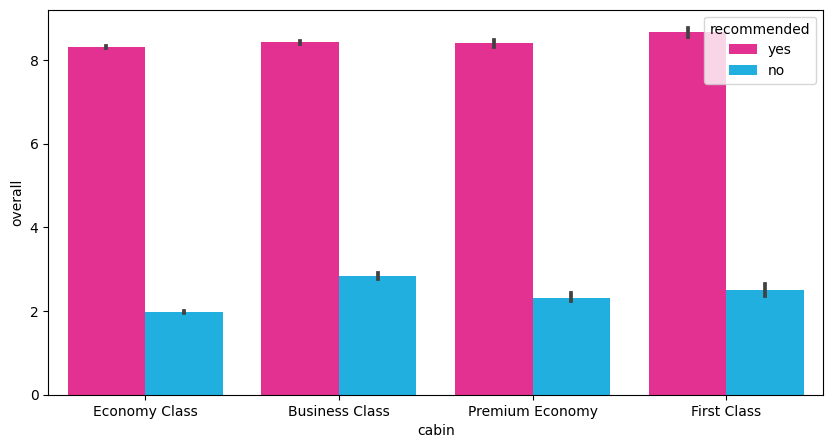

In [33]:
#Cabin type and overall service ratings (out of 10)
plt.figure(figsize=(10,5))
sns.barplot(x = df.cabin, y = df.overall, hue = df['recommended'], palette=['deeppink','deepskyblue'] )


From the above graph:

-Trips rated above 8 in the overall section are highly likely to be recommended by travelers.

-However, if the rating falls below 3, unhappy travelers, regardless of their cabin type, haven't referred the airlines to their friends.

**7)Which travellers_type receive the best service ratings overall?**

<Axes: xlabel='traveller_type', ylabel='overall'>

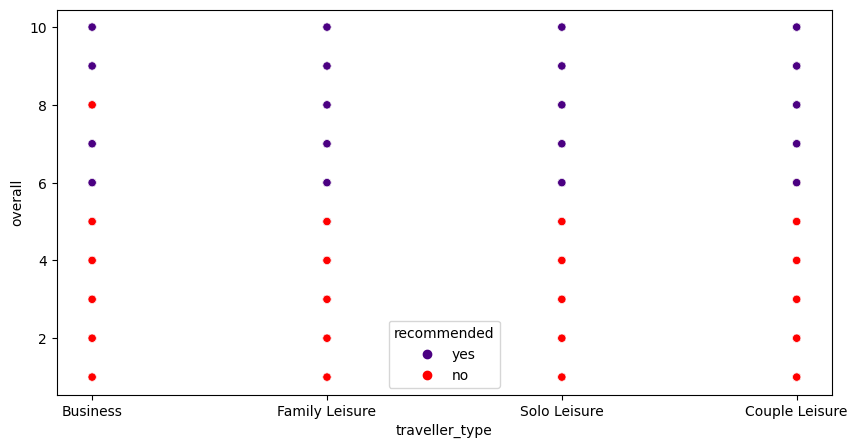

In [34]:
#Traveller type and overall service ratings (out of 10 )
plt.figure(figsize=(10,5))
sns.scatterplot(x =df.traveller_type, y= df.overall, hue = df['recommended'], palette= ['indigo','red'])


<Axes: xlabel='traveller_type', ylabel='value_for_money'>

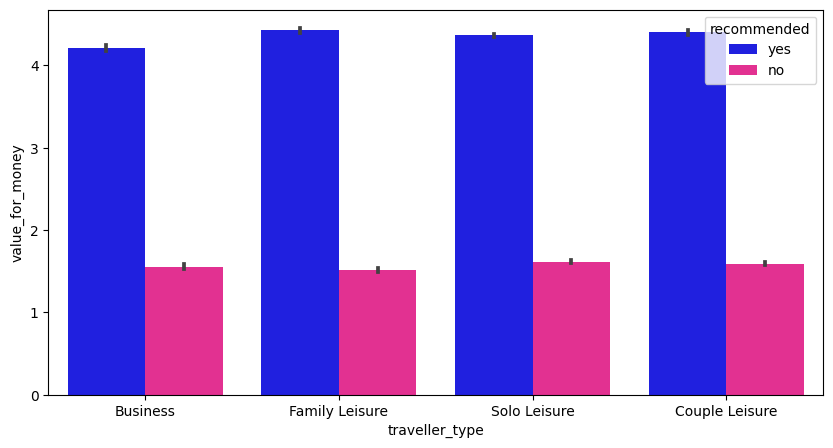

In [35]:
#Traveller type and value for money ratings (out of 5 )
plt.figure(figsize=(10,5))
sns.barplot(x =df.traveller_type, y = df.value_for_money, hue = df['recommended'], palette= ['blue','deeppink'])


According to graph:

-If the cabin service receives a rating of 5, it's highly probable that the reviewer recommended the airline for travel, regardless of the cabin type.

-Among the cabin types, Economy class is the most recommended, while Business class is the least recommended.

**8)Which airline had the most number of trips?**

In [36]:
# Get the number of trips each airline make.
trip_by_airlines = df['airline'].value_counts()
trip_by_airlines

Spirit Airlines       2871
American Airlines     2846
United Airlines       2774
British Airways       2731
Emirates              1763
                      ... 
QantasLink             104
Adria Airways           85
Air Arabia              80
Tunisair                71
Thai Smile Airways      48
Name: airline, Length: 81, dtype: int64

Getting more visualized view of top 10 airlines trip through graph.

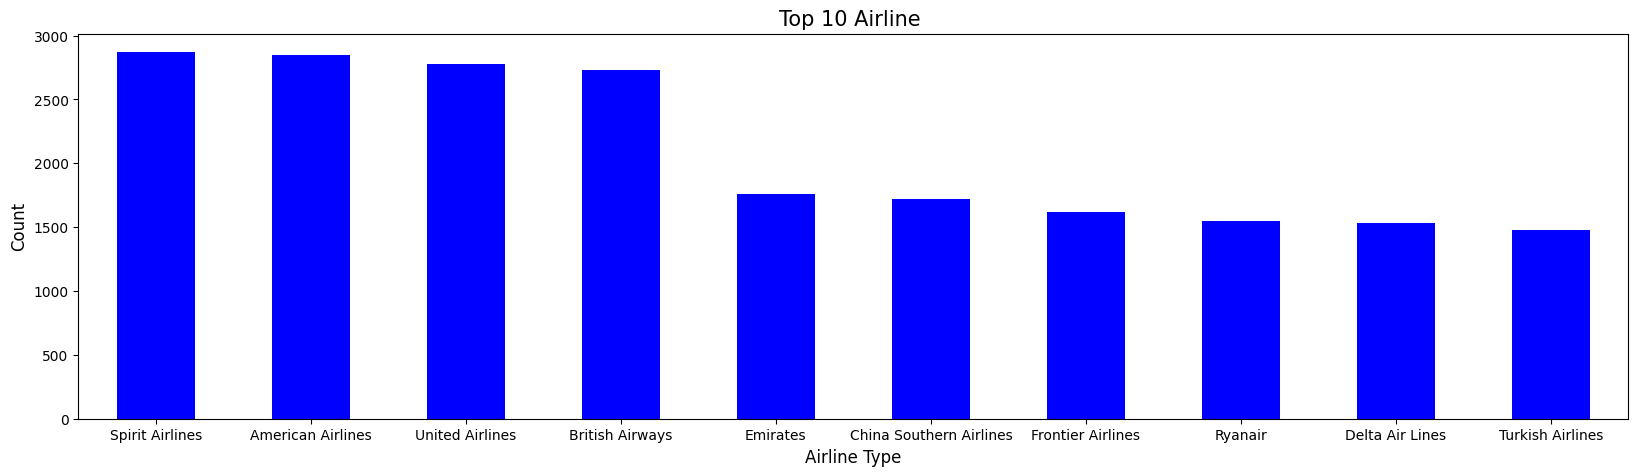

In [37]:
# Visualize the top 10 airlines with most trips
plt.figure(figsize=(20,5))
trip_by_airlines[:10].plot(kind='bar',color = 'blue')
plt.xlabel('Airline Type',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Top 10 Airline ',fontsize=15)
plt.xticks(rotation='horizontal')
plt.show()

We have observed that the top 10 airlines with most trips are-

-Spirit Airlines

-American Airlines

-United Airlines

-British Airways

-Emirates

-china southern airline

-frontier airlines

-ryanair

-delta air lines

-turkish airlines

**9)Comparison of all individual factors or characteristics that are not dependent on other variables?**

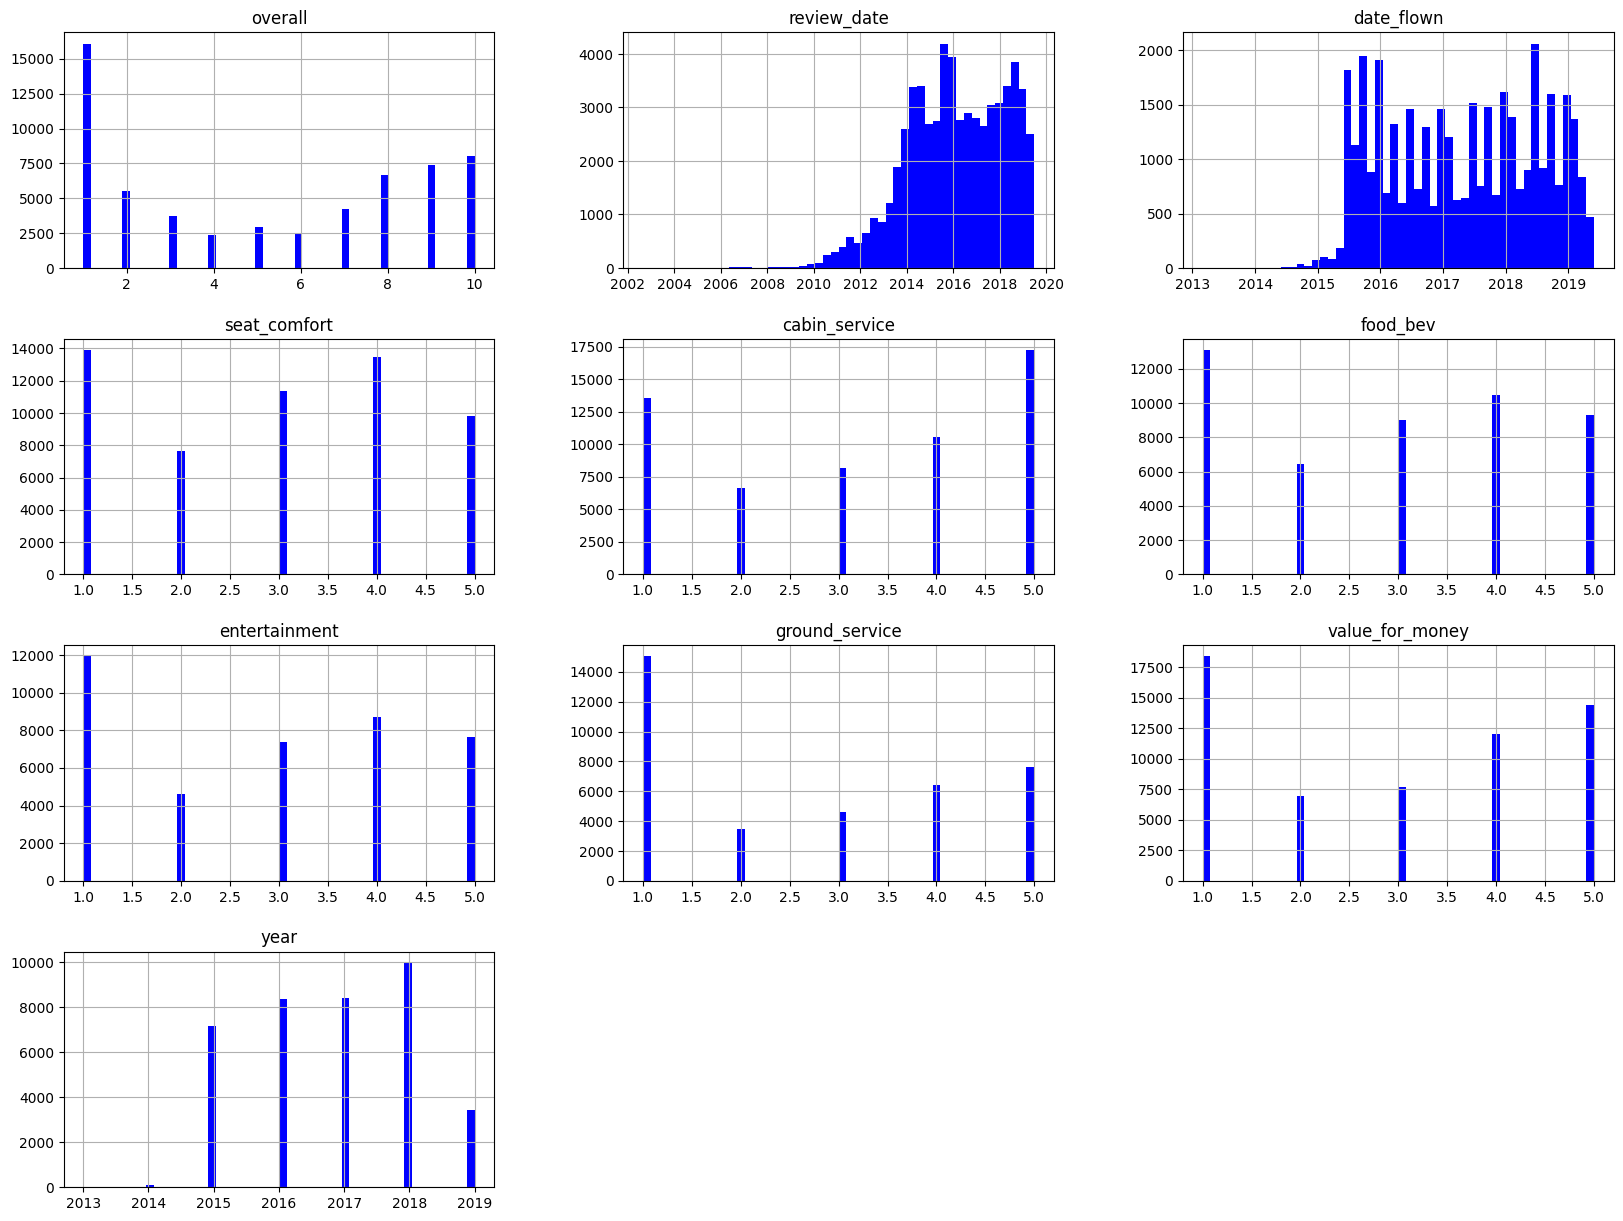

In [38]:
#frequency distribution using histgram
df.hist(bins=50, figsize=(20,15),color = 'blue')
plt.show()

From above plot

The overall feature ratings of 1 to 2 occur more frequently.
From Seat comfort feature, We can say that rating of 1 is highest and rating of 4 is the second highest.

From cabin service feature, We can say that rating of 5 is highest and rating of 1 is the second highest.

The food bev feature ratings of 2,4 and 5 are varies equally.Which means their frequency are approximately equal.

The features of both the entertainment & ground service, We can say that ratings of 3 is highest and ratings of 1 is the second highest.

From value for money feature, It clearly shows that most of the passenger gives ratings of 1 as highest. From this we can say that most of the airline does not provide good service to passenger.rewrite in a simple and new words

## **Multivariate Analysis**

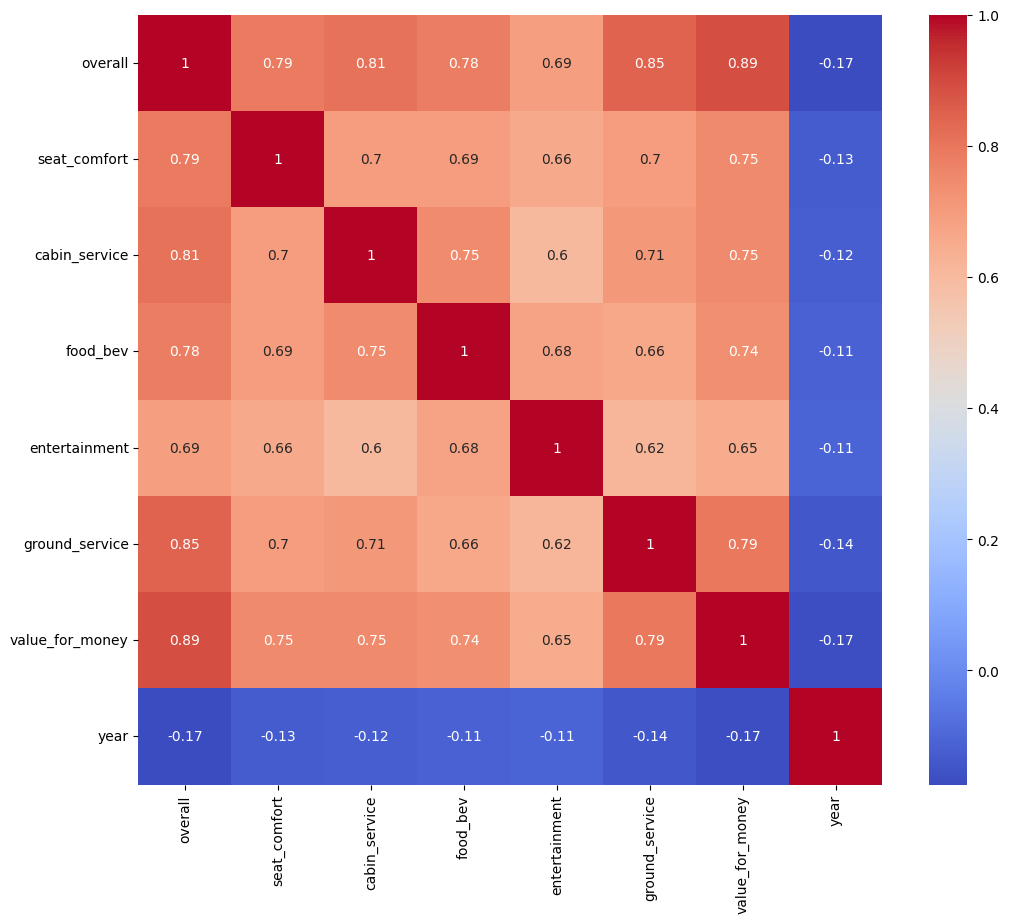

In [39]:
# Examining the heatmap and correlation matrix to determine the relationship between the variables
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

Drop overall column as it has highest correlation value than others.

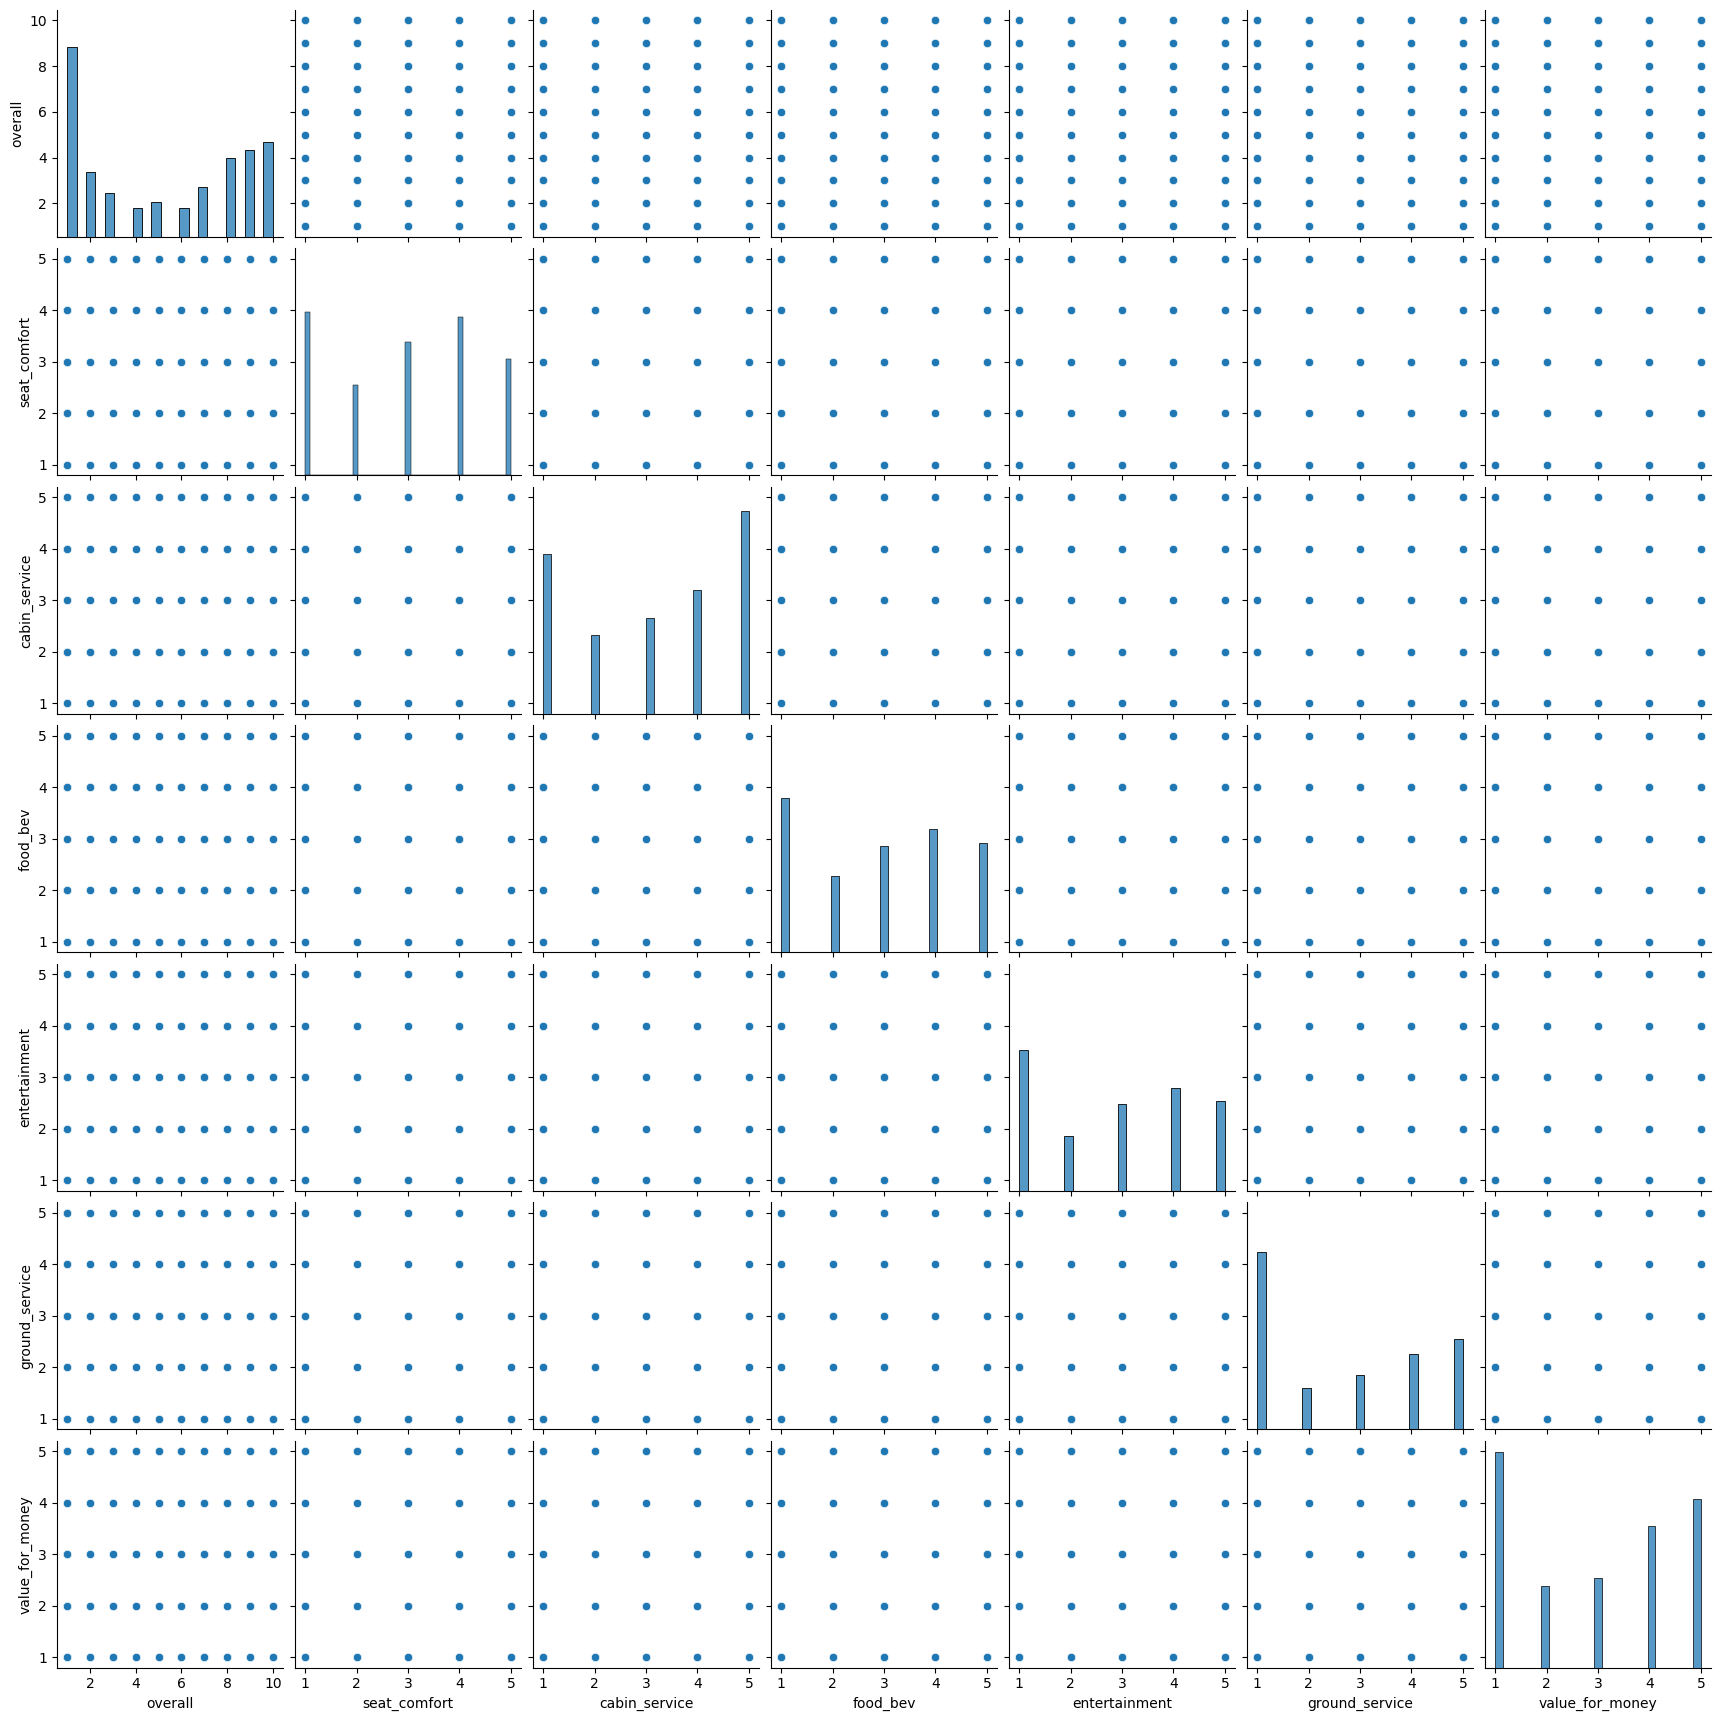

In [40]:
# Pair Plot visualization code

columns = ['overall', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']

# Create a pairplot
sns.pairplot(df[columns])
plt.show()

Since all the variables are discrete in nature, it is not possible to reach any conclusion without further data analysis.

##<font size='5px'><font color='#green'>**5. Hypothesis Testing**

 To perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

 Hypothesis 1: "Passengers who give higher ratings for seat comfort are more inclined to recommend the airline."

Hypothesis 2: "Reviews written in recent years tend to be more critical of airline services than reviews from earlier years."

Hypothesis 3: "Travelers who fly for business purposes tend to rate cabin service higher than those traveling for leisure."

##**Hypothesis 1-**

**Null Hypothesis (H0)**: There is no strong connection between how passengers rate seat comfort and their tendency to recommend the airline.

**Alternative Hypothesis (H1)**: There is a clear relationship between passengers' seat comfort ratings and their inclination to recommend the airline.

### Perform an appropriate statistical test.

In [41]:
# Perform Statistical Test to obtain P-Value

# Dropping the Null Value from the "recommended" & "seat_comfort" column
recommended=df['recommended'].dropna()
seat_comfort=df['seat_comfort'].dropna()

# Convert the data in 'recommended' columns to numeric
recommended=recommended.replace({'yes': 1, 'no': 0})

# Picking out 100 Random Samples to perform t-test
sample_recommended=recommended.sample(100,random_state=42)
sample_seat_comfort=seat_comfort.sample(100,random_state=42)

# Perform t-test
t_statistic, p_value = stats.ttest_ind(sample_seat_comfort, sample_recommended)

# Set the significance level (alpha)
alpha = 0.05

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Compare p-value with alpha to make a decision
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in seat comfort ratings.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in seat comfort ratings.")

t-statistic: 16.68170252432654
p-value: 1.3482544119270983e-39
Reject the null hypothesis. There is a significant difference in seat comfort ratings.


### Which statistical test have you done to obtain P-Value?

T-test are performed to find P-value.

### Why did you choose the specific statistical test?

"A t-test is a method often used to see if there's a real difference between two groups. It helps us figure out if the difference we see is likely a true difference or just something that could have happened randomly."


## **Hypothesis 2**

**Null Hypothesis (H0)**: The average ratings of airline reviews in recent years are about the same as the average ratings from earlier years.

**Alternative Hypothesis (H1)**: The average ratings of airline reviews in recent years are notably lower than the average ratings from earlier years.

### Perform an appropriate statistical test.

In [42]:
# Perform Statistical Test to obtain P-Value

# Define a threshold year to distinguish recent and earlier years
threshold_year = 2019

# Split the data into two groups: recent and earlier years
recent_years = df[df['year'] >= threshold_year]['overall']
earlier_years = df[df['year'] < threshold_year]['overall']

# Dropping the null value
recent_years=recent_years.dropna()
earlier_years=earlier_years.dropna()

# Picking 100 random samples to perform t-test
random_recent_years=recent_years.sample(100,random_state=42)
random_earlier_years=earlier_years.sample(100,random_state=42)

# Perform a t-test to compare the average overall ratings
t_statistic, p_value = stats.ttest_ind(random_recent_years, random_earlier_years)

# Set the significance level (alpha)
alpha = 0.05

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Compare p-value with alpha to make a decision
if p_value < alpha:
    print("Reject the null hypothesis. Reviews from recent years are more critical of airline services compared to reviews from earlier years.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in review ratings between recent and earlier years.")


t-statistic: -1.2621781197880695
p-value: 0.20836937699784344
Fail to reject the null hypothesis. There is no significant difference in review ratings between recent and earlier years.


### Which statistical test have you done to obtain P-Value?

T-test are performed to find P-value.

### Why did you choose the specific statistical test?

"A t-test is a method often used to see if there's a real difference between two groups. It helps us figure out if the difference we see is likely a true difference or just something that could have happened randomly."

### **Hypothesis 3**

**Null Hypothesis (H0)**: People who travel for business purposes and those who travel for leisure give similar average ratings for cabin service.

**Alternative Hypothesis (H1)**: Travelers on business trips tend to give notably higher ratings for cabin service compared to travelers on leisure trips.

##  Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value

# Convert 'traveller_type' column to lowercase for consistency
df['traveller_type'] = df['traveller_type'].str.lower()

# Define the two groups: business travelers and leisure travelers
business_travelers = df[df['traveller_type'] == 'business']['cabin_service']
leisure_travelers = df[df['traveller_type'] !='business']['cabin_service']

# Dropping the Null Value from
business_travelers=business_travelers.dropna()
leisure_travelers=leisure_travelers.dropna()

# Picking 100 random samples to perform t-test
sample_business_travelers=business_travelers.sample(100,random_state=42)
sample_couple_travelers=leisure_travelers.sample(100,random_state=42)

# Perform a t-test to compare the average cabin service ratings
t_statistic, p_value = stats.ttest_ind(sample_business_travelers, sample_couple_travelers)

# Set the significance level (alpha)
alpha = 0.05

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Compare p-value with alpha to make a decision
if p_value < alpha:
    print("Reject the null hypothesis. Business travelers rate cabin service higher than leisure travelers.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in cabin service ratings between business and leisure travelers.")


t-statistic: -0.699662892383371
p-value: 0.4849590309668781
Fail to reject the null hypothesis. There is no significant difference in cabin service ratings between business and leisure travelers.


### Which statistical test have you done to obtain P-Value?

T-test are performed to find P-value.

### Why did you choose the specific statistical test?

"A t-test is a method often used to see if there's a real difference between two groups. It helps us figure out if the difference we see is likely a true difference or just something that could have happened randomly."

##<font size='5px'><font color='paintpurple'>***6. Feature Engineering & Data Pre-processing***

## <font size='5px'><font color='purple'>**Handling Missing Values**

In [44]:
# Making copy of original dataframe
df=df.copy()

In [45]:
# Columns to Keep

df=df[['overall','traveller_type', 'cabin','seat_comfort','cabin_service', 'food_bev',
               'entertainment', 'ground_service','value_for_money', 'recommended']]

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61184 entries, 0 to 131894
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   overall          59401 non-null  float64
 1   traveller_type   37540 non-null  object 
 2   cabin            58705 non-null  object 
 3   seat_comfort     56211 non-null  float64
 4   cabin_service    56240 non-null  float64
 5   food_bev         48341 non-null  float64
 6   entertainment    40230 non-null  float64
 7   ground_service   37169 non-null  float64
 8   value_for_money  59327 non-null  float64
 9   recommended      59761 non-null  object 
dtypes: float64(7), object(3)
memory usage: 5.1+ MB


In [47]:
df.isnull().sum()

overall             1783
traveller_type     23644
cabin               2479
seat_comfort        4973
cabin_service       4944
food_bev           12843
entertainment      20954
ground_service     24015
value_for_money     1857
recommended         1423
dtype: int64

In [48]:
# Handling Missing Values

# Imputing numerical column with mean using Sklearn Simple Imputer method
from sklearn.impute import SimpleImputer

# Columns to impute
numeric_column=['overall', 'seat_comfort', 'cabin_service','food_bev', 'entertainment', 'ground_service', 'value_for_money']
categorical_column=['traveller_type', 'cabin']

# Create instance of Simple Imputer with mean strategy
numeric_imputer=SimpleImputer(strategy='mean')
categorical_imputer=SimpleImputer(strategy='most_frequent')

# Fitting the imputer method
df[numeric_column]=numeric_imputer.fit_transform(df[numeric_column])
df[categorical_column]=categorical_imputer.fit_transform(df[categorical_column])

# Applying dropna() method on target variable
df.dropna(subset='recommended',inplace=True)

In [49]:
# Verify for null values are removed
df.isnull().sum()

overall            0
traveller_type     0
cabin              0
seat_comfort       0
cabin_service      0
food_bev           0
entertainment      0
ground_service     0
value_for_money    0
recommended        0
dtype: int64

In [50]:
df.shape

(59761, 10)

In [51]:
# Checking Duplicated Row
df.duplicated().sum()

31419

In [52]:
# Dropping Duplicated Row
df.drop_duplicates(inplace=True)

# Again Checking Duplicated Row
df.duplicated().sum()

0

In [53]:
# Nullfree shape of dataset
df.shape

(28342, 10)

#### What all missing value imputation techniques have you used and why did you use those techniques?

Mean imputation technique is used on numerical columns while mode imputation technique is used on categorical columns.

The Target column("recommended") is imputed using dropna technique because using mode imputation on target column will lead to Class Imbalance.

### <font size='5px'><font color='darkcyan'> **Handling Outliers**

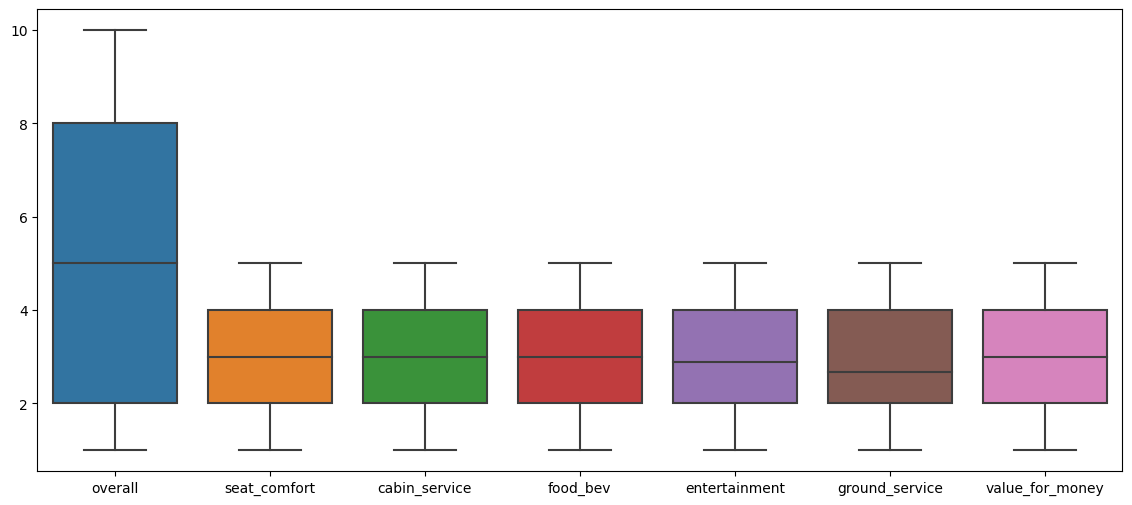

In [54]:
# Handling Outliers & Outlier treatments
plt.figure(figsize=(14,6))
sns.boxplot(df)
plt.show()

##### What all outlier treatment techniques have you used and why did you use those techniques?

There is no need to address outliers because there are no outliers in the independent variables.

## <font size='5px'><font color='deeppink'>**Categorical Encoding**

In [55]:
# Encode your categorical columns

# Binary Encoding Target Variable
df['recommended']=df['recommended'].replace({'yes': 1, 'no': 0})

# Applying Ordinal Encoding to cabin column
df['cabin']=df['cabin'].replace({'Economy Class':0, 'Premium Economy':1, 'Business Class' : 2,'First Class':3})

# Applying One Hot Encoding to Traveller_Type column
ohe=pd.get_dummies(df['traveller_type'],drop_first=True)

# Concatenating the encoded feature with original dataframe
df=pd.concat([df,ohe],axis=1)

# Dropping traveller_type column from the dataframe
df=df.drop('traveller_type',axis=1)

In [56]:
df.head()

,overall,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,couple leisure,family leisure,solo leisure
1,7.0,0,4.0,5.0,4.0,4.0,2.0,4.0,1,0,0,0
3,2.0,0,4.0,1.0,1.0,1.0,1.0,1.0,0,0,1,0
5,3.0,0,1.0,4.0,1.0,3.0,1.0,2.0,0,0,0,0
7,10.0,0,4.0,5.0,5.0,5.0,5.0,5.0,1,0,0,1
9,1.0,0,1.0,1.0,1.0,1.0,1.0,1.0,0,0,0,1


#### What all categorical encoding techniques have you used & why did you use those techniques?

**Binary Encoding**: Converts 'yes' and 'no' into 1s and 0s, used for two-category predictions.

**Ordinal Encoding**: Assigns numbers based on order/ranking (e.g., cabin classes).

**One-Hot Encoding**: Creates binary columns for categories without order, indicating presence (1) or absence (0) of each category, dropping one column to prevent redundancy.

#<font size='5px'><font color='darkorange'>**Feature Manipulation & Selection**

### <font size='5px'><font color='darkcyan'>**Feature Manipulation**

In [57]:
# Checking Multicollinearity

def calculate_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [round(variance_inflation_factor(X.values, i),2) for i in range(X.shape[1])]
    return vif

# Select columns for which VIF is calculated
selected_columns = [col for col in df.describe().columns if col not in ['recommended']]

# Selecting the columns from DataFrame
selected_data = df[selected_columns]

# Calculate VIF for the selected columns
vif_result = calculate_vif(selected_data)

# Sort the VIF result DataFrame by VIF in descending order
vif_result_sorted = vif_result.sort_values(by='VIF', ascending=False)

print(vif_result_sorted)

           Features    VIF
7   value_for_money  14.50
0           overall  12.65
3     cabin_service  10.91
2      seat_comfort  10.32
4          food_bev   9.86
6    ground_service   8.66
5     entertainment   7.94
10     solo leisure   3.49
8    couple leisure   1.85
9    family leisure   1.64
1             cabin   1.47


## <font size='5px'><font color='paleyellow'>**Feature Selection**

In [58]:
# Select your features wisely to avoid overfitting

# Identify columns with high VIF
high_vif_cols = vif_result[vif_result['VIF'] > 12]['Features']

# Remove columns with high VIF
df.drop(high_vif_cols, axis=1, inplace=True)
df.head()

,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,recommended,couple leisure,family leisure,solo leisure
1,0,4.0,5.0,4.0,4.0,2.0,1,0,0,0
3,0,4.0,1.0,1.0,1.0,1.0,0,0,1,0
5,0,1.0,4.0,1.0,3.0,1.0,0,0,0,0
7,0,4.0,5.0,5.0,5.0,5.0,1,0,0,1
9,0,1.0,1.0,1.0,1.0,1.0,0,0,0,1


### <font size='5px'><font color='faintbrown'> **Data Transformation**

In [59]:
df.skew()

cabin             1.181600
seat_comfort     -0.122839
cabin_service    -0.306671
food_bev          0.040224
entertainment     0.004541
ground_service    0.157906
recommended       0.145618
couple leisure    1.639311
family leisure    2.209100
solo leisure     -0.152877
dtype: float64

## <font size='5px'><font color='purple'>**Data Scaling**

In [60]:
# Scaling your data

# Normalizing data using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
scaled_df = pd.DataFrame(sc.fit_transform(df))
scaled_df.columns = df.columns

In [61]:
scaled_df.head()

,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,recommended,couple leisure,family leisure,solo leisure
0,0.0,0.75,1.00,0.75,0.75,0.25,1.0,0.0,0.0,0.0
1,0.0,0.75,0.00,0.00,0.00,0.00,0.0,0.0,1.0,0.0
2,0.0,0.00,0.75,0.00,0.50,0.00,0.0,0.0,0.0,0.0
3,0.0,0.75,1.00,1.00,1.00,1.00,1.0,0.0,0.0,1.0
4,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,1.0


##### Which method have you used to scale you data and why?

MinMax scaling helps to adjust the data.

When we remove outliers, a few outliers might still be present. MinMax scaling is good at minimizing the impact of these outliers. It squeezes the entire data range into values between 0 and 1.

## **Dimensionality Reduction**

##### Do you think that dimensionality reduction is needed? Explain Why?

Reducing dimensions can cause loss of information. But since our dataset has only 10 features, there's less chance of overfitting. Having fewer features means the model has fewer chances to mistakenly learn from random patterns, so using techniques like PCA to reduce dimensions might not be necessary.

## <font size='5px'><font color='piorange'>**Data Splitting**

In [64]:
# Split your data to train and test. Choose Splitting ratio wisely.
X=scaled_df.drop('recommended',axis=1)
y=scaled_df['recommended']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20,random_state=10)

In [65]:
print(X_train.shape)
print(X_test.shape)

(22673, 9)
(5669, 9)
